<a href="https://colab.research.google.com/github/Mahdi-Saadati/Machine-Learning-Mastery-with-Python/blob/main/7.%20Evaluate%20the%20Performance%20of%20Machine%20Learning%20Algorithms%20with%20Resampling.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Evaluate the Performance of Machine Learning Algorithms with Resampling**

You need to know how well your algorithms perform on unseen data. The best way to evaluate the performance of an algorithm would be to make predictions for new data to which you already know the answers. The second best way is to use clever techniques from statistics called resampling methods that allow you to make accurate estimates for how well your algorithm will perform on new data. In this chapter you will discover how you can estimate the accuracy of your machine learning algorithms using resampling methods in Python and scikit-learn on the Pima Indians dataset.

**7.1 Evaluate Machine Learning Algorithms**

Why can't you prepare your machine learning algorithm on your training dataset and use predictions from this same dataset to evaluate performance? The simple answer is overfitting. Imagine an algorithm that remembers every observation it is shown during training. If you evaluated your machine learning algorithm on the same dataset used to train the algorithm, then an algorithm like this would have a perfect score on the training dataset. But the predictions it made on new data would be terrible. We must evaluate our machine learning algorithms on data that is not used to train the algorithm.
The evaluation is an estimate that we can use to talk about how well we think the algorithm may actually do in practice. It is not a guarantee of performance. Once we estimate the performance of our algorithm, we can then re-train the final algorithm on the entire training dataset and get it ready for operational use. Next up we are going to look at four different techniques that we can use to split up our training dataset and create useful estimates of performance for our machine learning algorithms:

•	Train and Test Sets.

•	k-fold Cross-Validation.

•	Leave One Out Cross-Validation.

•	Repeated Random Test-Train Splits.

**7.2 Split into Train and Test Sets**

The simplest method that we can use to evaluate the performance of a machine learning algorithm is to use different training and testing datasets. We can take our original dataset and split it into two parts. Train the algorithm on the first part, make predictions on the second part and evaluate the predictions against the expected results. The size of the split can depend on the size and specifics of your dataset, although it is common to use 67% of the data for training and the remaining 33% for testing.
This algorithm evaluation technique is very fast. It is ideal for large datasets (millions of records) where there is strong evidence that both splits of the data are representative of the underlying problem. Because of the speed, it is useful to use this approach when the algorithm you are investigating is slow to train. A downside of this technique is that it can have a high variance. This means that differences in the training and test dataset can result in meaningful differences in the estimate of accuracy. In the example below we split the Pima Indians dataset into 67%/33% splits for training and test and evaluate the accuracy of a Logistic Regression model.

In [ ]:
# Evaluate using a train and a test set
from pandas import read_csv
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
filename = 'pima-indians-diabetes.data.csv'
names = ['preg', 'plas', 'pres', 'skin', 'test', 'mass', 'pedi', 'age', 'class']
dataframe = read_csv(filename, names=names)
array = dataframe.values
X = array[:,0:8]
Y = array[:,8]
test_size = 0.33
seed = 7
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=test_size,
random_state=seed)
model = LogisticRegression()
model.fit(X_train, Y_train)
result = model.score(X_test, Y_test)
print("Accuracy: %.3f%%") % (result*100.0)

We can see that the estimated accuracy for the model was approximately 75%. Note that in addition to specifying the size of the split, we also specify the random seed. Because the split of the data is random, we want to ensure that the results are reproducible. By specifying the random seed we ensure that we get the same random numbers each time we run the code and in turn the same split of data. This is important if we want to compare this result to the estimated accuracy of another machine learning algorithm or the same algorithm with a different configuration. To ensure the comparison was apples-for-apples, we must ensure that they are trained and tested on exactly the same data.

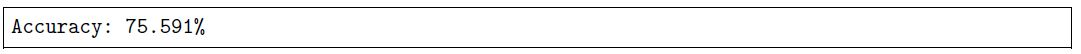

**7.3 K-fold Cross-Validation**

Cross-validation is an approach that you can use to estimate the performance of a machine learning algorithm with less variance than a single train-test set split. It works by splitting the dataset into k-parts (e.g. k = 5 or k = 10). Each split of the data is called a fold. The algorithm is trained on k K-1 folds with one held back and tested on the held back fold. This is repeated so that each fold of the dataset is given a chance to be the held back test set. After running cross-validation you end up with k different performance scores that you can summarize using a mean and a standard deviation.
The result is a more reliable estimate of the performance of the algorithm on new data. It is more accurate because the algorithm is trained and evaluated multiple times on different data. The choice of k must allow the size of each test partition to be large enough to be a reasonable sample of the problem, whilst allowing enough repetitions of the train-test evaluation of the algorithm to provide a fair estimate of the algorithms performance on unseen data. For modest sized datasets in the thousands or tens of thousands of records, k values of 3, 5 and 10 are common. In the example below we use 10-fold cross-validation.


In [ ]:
# Evaluate using Cross Validation
from pandas import read_csv
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score
from sklearn.linear_model import LogisticRegression
filename = 'pima-indians-diabetes.data.csv'
names = ['preg', 'plas', 'pres', 'skin', 'test', 'mass', 'pedi', 'age', 'class']
dataframe = read_csv(filename, names=names)
array = dataframe.values
X = array[:,0:8]
Y = array[:,8]
num_folds = 10
seed = 7
kfold = KFold(n_splits=num_folds, random_state=seed)
model = LogisticRegression()
results = cross_val_score(model, X, Y, cv=kfold)
print("Accuracy: %.3f%% (%.3f%%)") % (results.mean()*100.0, results.std()*100.0)

You can see that we report both the mean and the standard deviation of the performance measure. When summarizing performance measures, it is a good practice to summarize the distribution of the measures, in this case assuming a Gaussian distribution of performance (a very reasonable assumption) and recording the mean and standard deviation.

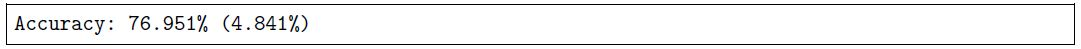

**7.4 Leave One Out Cross-Validation**

You can configure cross-validation so that the size of the fold is 1 (k is set to the number of observations in your dataset). This variation of cross-validation is called leave-one-out cross-validation. The result is a large number of performance measures that can be summarized in an effort to give a more reasonable estimate of the accuracy of your model on unseen data. A downside is that it can be a computationally more expensive procedure than k-fold cross-validation. In the example below we use leave-one-out cross-validation.


In [ ]:
# Evaluate using Leave One Out Cross Validation
from pandas import read_csv
from sklearn.model_selection import LeaveOneOut
from sklearn.model_selection import cross_val_score
from sklearn.linear_model import LogisticRegression
filename = 'pima-indians-diabetes.data.csv'
names = ['preg', 'plas', 'pres', 'skin', 'test', 'mass', 'pedi', 'age', 'class']
dataframe = read_csv(filename, names=names)
array = dataframe.values
X = array[:,0:8]
Y = array[:,8]
loocv = LeaveOneOut()
model = LogisticRegression()
results = cross_val_score(model, X, Y, cv=loocv)
print("Accuracy: %.3f%% (%.3f%%)") % (results.mean()*100.0, results.std()*100.0)

You can see in the standard deviation that the score has more variance than the k-fold cross-validation results described above.

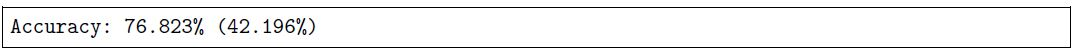

**7.5 Repeated Random Test-Train Splits**

Another variation on k-fold cross-validation is to create a random split of the data like the train/test split described above, but repeat the process of splitting and evaluation of the algorithm multiple times, like cross-validation. This has the speed of using a train/test split and the reduction in variance in the estimated performance of k-fold cross-validation. You can also repeat the process many more times as needed to improve the accuracy. A down side is that repetitions may include much of the same data in the train or the test split from run to run, introducing redundancy into the evaluation. The example below splits the data into a 67%/33% train/test split and repeats the process 10 times.

In [ ]:
# Evaluate using Shuffle Split Cross Validation
from pandas import read_csv
from sklearn.model_selection import ShuffleSplit
from sklearn.model_selection import cross_val_score
from sklearn.linear_model import LogisticRegression
filename = 'pima-indians-diabetes.data.csv'
names = ['preg', 'plas', 'pres', 'skin', 'test', 'mass', 'pedi', 'age', 'class']
dataframe = read_csv(filename, names=names)
array = dataframe.values
X = array[:,0:8]
Y = array[:,8]
n_splits = 10
test_size = 0.33
seed = 7
kfold = ShuffleSplit(n_splits=n_splits, test_size=test_size, random_state=seed)
model = LogisticRegression()
results = cross_val_score(model, X, Y, cv=kfold)
print("Accuracy: %.3f%% (%.3f%%)") % (results.mean()*100.0, results.std()*100.0)

We can see that in this case the distribution of the performance measure is on par with k-fold cross-validation above.

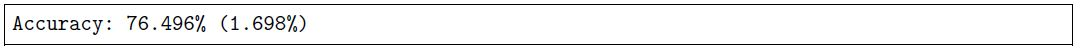

**7.6 What Techniques to Use When**

This section lists some tips to consider what resampling technique to use in different circumstances.

•	Generally k-fold cross-validation is the gold standard for evaluating the performance of a machine learning algorithm on unseen data with k set to 3, 5, or 10.

•	Using a train/test split is good for speed when using a slow algorithm and produces performance estimates with lower bias when using large datasets.

•	Techniques like leave-one-out cross-validation and repeated random splits can be useful intermediates when trying to balance variance in the estimated performance, model training speed and dataset size.

The best advice is to experiment and find a technique for your problem that is fast and produces reasonable estimates of performance that you can use to make decisions. If in doubt, use 10-fold cross-validation.
